### 1. 필요한 컬럼만 추출

In [2]:
import pandas as pd

`scandal`: ALL스캔들 csv

(column: 소속사, 사건 날짜)

In [3]:
df = pd.read_csv("C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/스캔들/ALL논란_Final.csv", parse_dates=['사건 날짜'])
scandal = df[['소속사', '연예인 이름', '사건 날짜', '그룹', '사건 내용']].copy()
scandal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   소속사     363 non-null    object        
 1   연예인 이름  363 non-null    object        
 2   사건 날짜   363 non-null    datetime64[ns]
 3   그룹      251 non-null    object        
 4   사건 내용   363 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 14.3+ KB


In [4]:
len(scandal)

363

### 2. 정상 및 비정상 수익률 산출

#### (0) 필요한 함수 정의

> 로그 수익률 계산 함수

In [5]:
import numpy as np

def log_return(df):
    df = df.sort_values('날짜').reset_index(drop=True).copy()
    df['로그 수익률'] = np.log(df['종가'] / df['종가'].shift(1)) # 로그 수익률: log(당일종가/전일종가) 
    return df.dropna().reset_index(drop=True)

> 스캔들-주가 날짜 매핑 함수

스캔들 날짜와 같거나 가장 가까이 있는 주가 날짜로 매핑

In [6]:
def map_closet_date(scandal_date, stock_date):
    return stock_date[stock_date>=scandal_date].min()

#### (1) 소속사/코스닥 주가에 로그 수익률 열 추가

코드 실행 시 생략

In [27]:
import pandas as pd
import numpy as np
import os

firms = scandal['소속사'].unique()

for firm in firms:
    file_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"
    stock = pd.read_csv(file_path, parse_dates=['날짜'])
    stock = log_return(stock)
    stock.to_csv(file_path, index=False, encoding='utf-8-sig')
    print(f'{firm} 로그 수익률 열 추가')

HYBE 로그 수익률 열 추가
JYP 로그 수익률 열 추가
RBW 로그 수익률 열 추가
SM 로그 수익률 열 추가
SM C&C 로그 수익률 열 추가
YG 로그 수익률 열 추가
아티스트컴퍼니 로그 수익률 열 추가
큐브 로그 수익률 열 추가
키이스트 로그 수익률 열 추가


In [107]:
file_path = "C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/코스닥.csv"
stock = pd.read_csv(file_path, parse_dates=['날짜'])
stock = log_return(stock)
stock.to_csv(file_path, index=False, encoding='utf-8-sig')
print('로그 수익률 열 추가')

로그 수익률 열 추가


#### (2) 시장 지수 선택

`market`: 시장 지수 csv

In [7]:
market = pd.read_csv("C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/코스닥.csv", parse_dates=['날짜'])

#### (3) 스캔들 날짜를 각각의 소속사 주가 날짜로 매핑

`매핑된 주가 날짜` 열을 `scandal`에 추가

In [8]:
import pandas as pd
import numpy as np
import os

mapped_dates =[]

for idx, row in scandal.iterrows():
    firm = row['소속사']
    scandal_date = row['사건 날짜']
    text = row['사건 내용']
    group = row['그룹']

    # 소속사 주가 파일 경로
    file_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"

    stock = pd.read_csv(file_path, parse_dates=['날짜'])
    stock_dates = stock['날짜']
    mapped_date = map_closet_date(scandal_date, stock_dates)
    mapped_dates.append(mapped_date)

scandal['매핑된 주가 날짜'] = mapped_dates

scandal[['소속사', '사건 날짜', '매핑된 주가 날짜', '사건 내용', '그룹']]

,소속사,사건 날짜,매핑된 주가 날짜,사건 내용,그룹
0,HYBE,2022-04-25,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단
1,HYBE,2024-01-06,2024-01-08,"2024년 1월 6일, 정국이 입대 후 신병 교육을 받는 동안 발생했다. 탈취범은 ...",방탄소년단
2,HYBE,2021-11-18,2021-11-18,"2021년 11월 18일 오후 5시 , ENHYPEN 은 D-1 이라는 제목으로 V...",엔하이픈
3,HYBE,2021-11-19,2021-11-19,2021년 11월 19일 사과문을 게시했다. [ 펼치기 · 접기 ] 엔진 여러분 안...,엔하이픈
4,HYBE,2023-01-10,2023-01-10,"2023년 1월 10일, 멤버 성훈과 함께 진행한 위버스 라이브 도중 요즘 한국사 ...",엔하이픈
...,...,...,...,...,...
358,키이스트,2024-05-07,2024-05-07,2024년 5월 7일 구하라법이 국회 법제사법위원회 법안심사소위원회를 통과했다.(의...,NaN
359,키이스트,2024-08-28,2024-08-28,"2024년 8월 28일, 만 5년의 세월과 두 차례의 폐기 끝에 마침내 제22대 국...",NaN
360,키이스트,2024-04-25,2024-04-25,2024년 4월 25일 이후 상속이 개시된 경우에도 소급 적용될 수 있도록 했다. ...,NaN
361,키이스트,2024-07-16,2024-07-16,2024년 7월 16일 에 I Do I Do 의 선공개 곡인 Hello 가 발표되었...,NaN


In [9]:
scandal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   소속사        363 non-null    object        
 1   연예인 이름     363 non-null    object        
 2   사건 날짜      363 non-null    datetime64[ns]
 3   그룹         251 non-null    object        
 4   사건 내용      363 non-null    object        
 5   매핑된 주가 날짜  363 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 17.1+ KB


#### (3) 각 사건에 대해 소속사 주가 데이터에서 행 번호 추출

In [10]:
stock_rows = []

for idx, row in scandal.iterrows():
    firm = row['소속사']
    mapped_date = row['매핑된 주가 날짜']

    file_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"
    stock = pd.read_csv(file_path, parse_dates=['날짜'])

    row_index = stock[stock['날짜'].dt.date == mapped_date.date()].index[0]

    stock_rows.append(row_index)

scandal['주가 행 인덱스']=stock_rows
scandal[['소속사', '연예인 이름', '사건 날짜', '매핑된 주가 날짜','주가 행 인덱스', '그룹', '사건 내용']]

,소속사,연예인 이름,사건 날짜,매핑된 주가 날짜,주가 행 인덱스,그룹,사건 내용
0,HYBE,지민,2022-04-25,2022-04-25,375,방탄소년단,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있..."
1,HYBE,정국,2024-01-06,2024-01-08,795,방탄소년단,"2024년 1월 6일, 정국이 입대 후 신병 교육을 받는 동안 발생했다. 탈취범은 ..."
2,HYBE,정원,2021-11-18,2021-11-18,269,엔하이픈,"2021년 11월 18일 오후 5시 , ENHYPEN 은 D-1 이라는 제목으로 V..."
3,HYBE,정원,2021-11-19,2021-11-19,270,엔하이픈,2021년 11월 19일 사과문을 게시했다. [ 펼치기 · 접기 ] 엔진 여러분 안...
4,HYBE,제이,2023-01-10,2023-01-10,552,엔하이픈,"2023년 1월 10일, 멤버 성훈과 함께 진행한 위버스 라이브 도중 요즘 한국사 ..."
...,...,...,...,...,...,...,...
358,키이스트,구하라,2024-05-07,2024-05-07,2493,NaN,2024년 5월 7일 구하라법이 국회 법제사법위원회 법안심사소위원회를 통과했다.(의...
359,키이스트,구하라,2024-08-28,2024-08-28,2571,NaN,"2024년 8월 28일, 만 5년의 세월과 두 차례의 폐기 끝에 마침내 제22대 국..."
360,키이스트,구하라,2024-04-25,2024-04-25,2487,NaN,2024년 4월 25일 이후 상속이 개시된 경우에도 소급 적용될 수 있도록 했다. ...
361,키이스트,구하라,2024-07-16,2024-07-16,2541,NaN,2024년 7월 16일 에 I Do I Do 의 선공개 곡인 Hello 가 발표되었...


In [11]:
sum(scandal['주가 행 인덱스'].isna())

0

#### (4) 비정상수익률 계산

- 이벤트 윈도우: -5 ~ +5

- 추정 윈도우: -90 ~ -6

> 윈도우 합집합인 -90 ~ +5 개 있는 스캔들만 필터링

In [12]:
윈도우_통과 = []

for i in range(len(scandal)):
    firm = scandal.loc[i, '소속사']
    stock_row = scandal.loc[i, '주가 행 인덱스']

    file_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"
    stock = pd.read_csv(file_path, parse_dates=['날짜'])

    est_start = stock_row - 90
    event_end = stock_row + 3

    if est_start >= 0 and event_end < len(stock):
        윈도우_통과.append(True)
    else:
        윈도우_통과.append(False)

scandal['윈도우 통과'] = 윈도우_통과
print("윈도우 통과 사건 수:", scandal['윈도우 통과'].sum(), "/", len(scandal))

윈도우 통과 사건 수: 356 / 363


In [13]:
scandal_final = scandal[(scandal['윈도우 통과'])].reset_index(drop=True)
len(scandal_final)

356

In [14]:
scandal_final.columns

Index(['소속사', '연예인 이름', '사건 날짜', '그룹', '사건 내용', '매핑된 주가 날짜', '주가 행 인덱스',
       '윈도우 통과'],
      dtype='object')

> 스캔들 날짜 -5 ~ +5로 시장 데이터 있는 행만 필터링

In [15]:
market_dates = set(market['날짜'])  # 빠른 포함 여부 검사 위해 set으로

행_완전한_사건 = []

for i in range(len(scandal_final)):
    firm = scandal_final.loc[i, '소속사']
    stock_row = scandal_final.loc[i, '주가 행 인덱스']

    file_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"
    stock = pd.read_csv(file_path, parse_dates=['날짜'])

    event_window = stock.iloc[stock_row - 3 : stock_row + 10].copy()

    if all(date in market_dates for date in event_window['날짜']):
        행_완전한_사건.append(i)

scandal_final = scandal_final.loc[행_완전한_사건].reset_index(drop=True)
len(scandal_final)

342

> 비정상 수익률 계산

In [16]:
from sklearn.linear_model import LinearRegression
import pandas as pd

result = []

for i in range(len(scandal_final)):
    firm = scandal_final.loc[i, '소속사']
    mapped_date = scandal_final.loc[i, '매핑된 주가 날짜']
    stock_row = scandal_final.loc[i, '주가 행 인덱스']
    scandal_date = scandal_final.loc[i, '사건 날짜']
    celeb_name = scandal_final.loc[i, '연예인 이름']
    text_all = scandal_final.loc[i, '사건 내용']
    group_all = scandal_final.loc[i, '그룹']

    stock_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"
    stock = pd.read_csv(stock_path, parse_dates=['날짜'])
    market_window = market[['날짜', '로그 수익률']].rename(columns={'로그 수익률': '시장 수익률'})

    # 추정기간, 시장모형 회귀
    est_window = stock.iloc[stock_row - 90 : stock_row - 3].copy()
    est_window = pd.merge(est_window, market_window, on='날짜', how='left')
    est_window = est_window.dropna()

    X = est_window[['시장 수익률']]
    y = est_window['로그 수익률']
    model = LinearRegression().fit(X, y)
    alpha = model.intercept_
    beta = model.coef_[0]

    # 사건기간, 비정상 수익률 계산
    event_window = stock.iloc[stock_row - 3 : stock_row + 10].copy()
    event_window = pd.merge(event_window, market_window, on='날짜', how='left')
    event_window = event_window.dropna()

    event_window['기대 수익률'] = alpha + beta * event_window['시장 수익률']
    event_window['비정상 수익률'] = event_window['로그 수익률'] - event_window['기대 수익률']
    event_window['event_window_day'] = event_window['event_window_day'] = (event_window['날짜'] - mapped_date).dt.days
    event_window['소속사'] = firm
    event_window['연예인 이름'] = celeb_name
    event_window['사건 날짜'] = scandal_date
    event_window['사건 내용'] = text_all
    event_window['그룹'] = group_all
    
    result.append(event_window)

abnormal = pd.concat(result, ignore_index=True)
abnormal

,날짜,종가,시가,고가,저가,거래량,변동 %,로그 수익률,시장 수익률,기대 수익률,비정상 수익률,event_window_day,소속사,연예인 이름,사건 날짜,사건 내용,그룹
0,2022-04-20,264000,281500,281500,263500,46509000.0,-5.71,-0.058841,-0.003228,-0.004898,-0.053943,-5,HYBE,지민,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단
1,2022-04-21,261000,263000,267000,257500,23326000.0,-1.14,-0.011429,0.001077,-0.000532,-0.010896,-4,HYBE,지민,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단
2,2022-04-22,254500,260000,260000,253500,21876000.0,-2.49,-0.025220,-0.007564,-0.009295,-0.015925,-3,HYBE,지민,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단
3,2022-04-25,250500,248500,257000,246500,16526000.0,-1.57,-0.015842,-0.025262,-0.027244,0.011402,0,HYBE,지민,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단
4,2022-04-26,260500,253000,264000,253000,25146000.0,3.99,0.039144,0.013260,0.011823,0.027321,1,HYBE,지민,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,2024-05-03,5950,5880,6060,5850,4005000.0,1.02,0.010135,-0.002309,-0.004612,0.014747,8,키이스트,구하라,2024-04-25,"2024년 4월 25일 위헌법률심판에 따른 위헌결정으로 효력이 ""결정이 있는 날""부...",NaN
4442,2024-05-07,5980,5950,6020,5940,2322000.0,0.50,0.005029,0.006912,0.000706,0.004323,12,키이스트,구하라,2024-04-25,"2024년 4월 25일 위헌법률심판에 따른 위헌결정으로 효력이 ""결정이 있는 날""부...",NaN
4443,2024-05-08,6070,5970,6100,5970,2240000.0,1.51,0.014938,0.001147,-0.002618,0.017557,13,키이스트,구하라,2024-04-25,"2024년 4월 25일 위헌법률심판에 따른 위헌결정으로 효력이 ""결정이 있는 날""부...",NaN
4444,2024-05-09,6040,6010,6100,6000,3019000.0,-0.49,-0.004955,-0.002296,-0.004605,-0.000350,14,키이스트,구하라,2024-04-25,"2024년 4월 25일 위헌법률심판에 따른 위헌결정으로 효력이 ""결정이 있는 날""부...",NaN


In [17]:
len(abnormal)/13

342.0

#### (5) AAR, CAAR 계산

- `AAR` (Average Abnormal Return): event_window_day별 비정상 수익률의 평균

- `CAAR` (Cumulative AAR):	AAR의 누적합


In [18]:
import numpy as np

# AAR
aar_df = abnormal.groupby('event_window_day')['비정상 수익률'].agg(['mean', 'std', 'count']).reset_index()
aar_df = aar_df.rename(columns={'mean': 'AAR', 'std': 'STD', 'count': 'N'})

# CAAR
aar_df['CAAR'] = aar_df['AAR'].cumsum()

#### (6) t검정 진행

> 각 AAR 값이 0과 통계적으로 다른지 검정

In [19]:
# t값 계산: AAR / (표준편차 / sqrt(N))
aar_df['t값'] = aar_df['AAR'] / (aar_df['STD'] / np.sqrt(aar_df['N']))

# 유의성 마크 추가
aar_df['유의(5%)'] = aar_df['t값'].abs() > 1.96
aar_df['유의(1%)'] = aar_df['t값'].abs() > 2.58

In [20]:
print("AAR / CAAR / t검정 결과:")
print(aar_df)

AAR / CAAR / t검정 결과:
    event_window_day       AAR       STD    N      CAAR        t값  유의(5%)  \
0                -23 -0.093361       NaN    1 -0.093361       NaN   False   
1                -22 -0.137399       NaN    1 -0.230760       NaN   False   
2                -21 -0.020123       NaN    1 -0.250883       NaN   False   
3                -10 -0.013690  0.023192    4 -0.264573 -1.180602   False   
4                 -9  0.007685  0.003453    2 -0.256889  3.147364    True   
5                 -8  0.014091  0.010792    4 -0.242798  2.611254    True   
6                 -7 -0.000329  0.020978   26 -0.243127 -0.079950   False   
7                 -6 -0.025492  0.089587   47 -0.268618 -1.950741   False   
8                 -5 -0.020050  0.089265  217 -0.288669 -3.308782    True   
9                 -4 -0.013225  0.127820  170 -0.301893 -1.349002   False   
10                -3  0.026177  0.230013  206 -0.275716  1.633450   False   
11                -2  0.000554  0.218902  152 -0.275163

-5 ~ +5만 필터링해서 보기

In [21]:
abnormal_10_10 = abnormal[abnormal['event_window_day'].between(-3, 10)].copy()

In [22]:
import numpy as np
from scipy.stats import t

aar_df = abnormal_10_10.groupby('event_window_day')['비정상 수익률'].agg(['mean', 'std', 'count']).reset_index()
aar_df = aar_df.rename(columns={'mean': 'AAR', 'std': 'STD', 'count': 'N'})
aar_df['CAAR'] = aar_df['AAR'].cumsum()

# t값 계산
aar_df['t값'] = aar_df['AAR'] / (aar_df['STD'] / np.sqrt(aar_df['N']))

# P-value 계산
aar_df['p값'] = 2 * (1 - t.cdf(aar_df['t값'].abs(), df=aar_df['N'] - 1))

# 유의성 표시
aar_df['유의(5%)'] = aar_df['p값'] < 0.05
aar_df['유의(1%)'] = aar_df['p값'] < 0.01

# 결과 확인
aar_df

,event_window_day,AAR,STD,N,CAAR,t값,p값,유의(5%),유의(1%)
0,-3,0.026177,0.230013,206,0.026177,1.633450,0.103909,False,False
1,-2,0.000554,0.218902,152,0.026731,0.031174,0.975172,False,False
2,-1,0.004736,0.183484,195,0.031466,0.360418,0.718927,False,False
3,0,-0.013477,0.135334,342,0.017989,-1.841679,0.066390,False,False
4,1,-0.026289,0.107473,276,-0.008300,-4.063707,0.000063,True,True
5,2,-0.024850,0.092866,222,-0.033150,-3.987055,0.000091,True,True
6,3,0.003502,0.174204,218,-0.029648,0.296803,0.766900,False,False
7,4,0.024480,0.245358,212,-0.005168,1.452713,0.147789,False,False
8,5,0.005002,0.228425,152,-0.000166,0.269975,0.787548,False,False
9,6,-0.017625,0.193318,207,-0.017792,-1.311751,0.191064,False,False


> CAAR 구간별 t검정

In [23]:
from scipy.stats import ttest_1samp
intervals = [(-10,10),
            (-10, 2), 
            (-5, 5), 
            (-5,2), 
            (-1, 0), 
            (-1,+1), 
            (+1,+2),
            (+1,+5),
            (+1,+10),
            (-1,+10)]

In [24]:
caar_results = []

for start, end in intervals:
    interval_df = abnormal[abnormal['event_window_day'].between(start, end)]

    car_by_event = (
        interval_df.groupby(['소속사', '연예인 이름', '사건 날짜'])['비정상 수익률']
        .sum()
        .reset_index()
        .rename(columns={'비정상 수익률': 'CAR'})
    )

    car_values = car_by_event['CAR'].values

    # CAAR 및 t-검정
    caar = car_values.mean()
    std = car_values.std(ddof=1)
    n = len(car_values)
    t_stat, p_val = ttest_1samp(car_values, 0)

    caar_results.append({
        '구간': f"[{start}, {end}]",
        'CAAR': caar,
        '표준편차': std,
        'N': n,
        't값': t_stat,
        'p값': p_val,
        '유의(5%)': abs(t_stat) > 1.96,
        '유의(1%)': abs(t_stat) > 2.58
    })

# 결과 DataFrame
caar_df = pd.DataFrame(caar_results)

In [25]:
caar_df

,구간,CAAR,표준편차,N,t값,p값,유의(5%),유의(1%)
0,"[-10, 10]",-0.082437,0.726206,319,-2.027497,0.043445,True,False
1,"[-10, 2]",-0.058841,0.362530,319,-2.898908,0.004005,True,True
2,"[-5, 5]",-0.034067,0.576530,319,-1.055366,0.292059,False,False
3,"[-5, 2]",-0.055112,0.363291,319,-2.709491,0.007104,True,True
4,"[-1, 0]",-0.011554,0.209646,319,-0.984357,0.325688,False,False
5,"[-1, 1]",-0.034299,0.245615,319,-2.494171,0.013133,True,False
6,"[1, 2]",-0.049125,0.206781,260,-3.830690,0.000160,True,True
7,"[1, 5]",-0.019053,0.360875,318,-0.941521,0.347155,False,False
8,"[1, 10]",-0.063635,0.524149,319,-2.168387,0.030870,True,False
9,"[-1, 10]",-0.075189,0.611872,319,-2.194781,0.028902,True,False


#### (7) 시각화

> AAR 분포

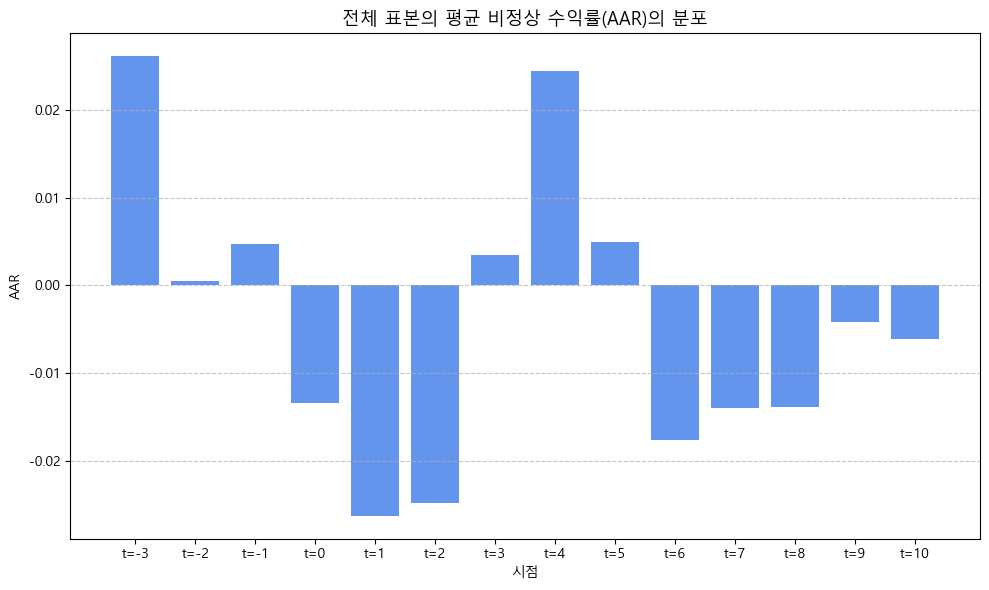

In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

aar_df_sorted = aar_df.sort_values('event_window_day')

plt.figure(figsize=(10, 6))
plt.bar(aar_df_sorted['event_window_day'], aar_df_sorted['AAR'], color='cornflowerblue')

plt.xticks(aar_df_sorted['event_window_day'], 
           [f"t={x}" for x in aar_df_sorted['event_window_day']], 
           rotation=0, ha='center')
plt.title("전체 표본의 평균 비정상 수익률(AAR)의 분포", fontsize=13)
plt.xlabel("시점")
plt.ylabel("AAR")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> 

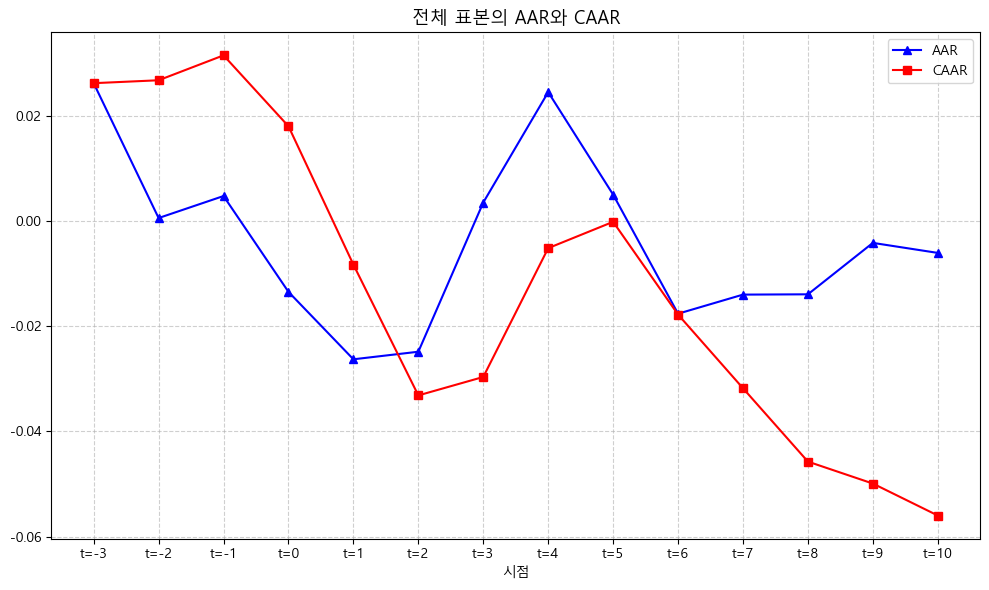

In [29]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

aar_df_sorted = aar_df.sort_values('event_window_day')

x = aar_df_sorted['event_window_day']
y1 = aar_df_sorted['AAR']
y2 = aar_df_sorted['CAAR']

plt.figure(figsize=(10, 6))
plt.plot(x, y1, color='blue', marker='^', label='AAR')
plt.plot(x, y2, color='red', marker='s', label='CAAR')
plt.xticks(x, [f"t={i}" for i in x], rotation=0)
plt.xlabel("시점")
plt.title("전체 표본의 AAR와 CAAR", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


### (8) 논문 테이블/그래프 형식 카피 

gpt로 그래프 카피 코드 달라함

> 표 2. 전체 표본의 평균 비정상 수익률(AAR)의 결과 값

| 열 이름                                      | 의미                            |
| ----------------------------------------- | ----------------------------- |
| **Event day**                             | 사건일 기준 상대 날짜 (AR(t))          |
| **Average Abnormal Return(%)**            | 해당일의 AAR (평균 비정상 수익률), 퍼센트 단위 |
| **T-Statistic**                           | AAR의 t-검정 통계량                 |
| **P-value**                               | t-검정의 유의확률 (AAR이 0과 유의하게 다른지) |
| **Cumulative Average Abnormal Return(%)** | 해당일까지 누적 AAR (CAAR), 퍼센트 단위   |
| **% of -Abnormal Returns**                | 해당일의 비정상 수익률이 **음수인 사건 비율**   |


In [97]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

summary_rows = []

for day in range(-3, 10):
    day_df = abnormal[abnormal['event_window_day'] == day]
    ar_values = day_df['비정상 수익률']

    if len(ar_values) == 0:
        continue

    aar = ar_values.mean()
    std = ar_values.std(ddof=1)
    n = len(ar_values)

    # t검정
    t_stat, p_val = ttest_1samp(ar_values, 0)

    # CAAR = AAR 누적합 (여기선 누적은 표 생성 이후 별도 처리)
    # 음의 수익률 비율
    neg_ratio = (ar_values < 0).mean() * 100

    summary_rows.append({
        'Event day': f"AR({day})",
        'AAR(%)': round(aar * 100, 2),
        'T-Statistic': round(t_stat, 5),
        'P-value': round(p_val, 3),
        'Negative AR%': round(neg_ratio, 2)
    })

# DataFrame 생성
summary_df = pd.DataFrame(summary_rows)

# CAAR 누적합 추가
summary_df['CAAR(%)'] = summary_df['AAR(%)'].cumsum()

# 열 순서 정리
summary_df = summary_df[['Event day', 'AAR(%)', 'T-Statistic', 'P-value', 'CAAR(%)', 'Negative AR%']]
summary_df.columns = ['Event day', 'Average Abnormal Return(%)', 'T-Statistic', 'P-value',
                      'Cumulative Average Abnormal Return(%)', '% of -Abnormal Returns']

# 결과 확인
summary_df
# summary_df.to_csv("event_study_summary_table.csv", index=False)


,Event day,Average Abnormal Return(%),T-Statistic,P-value,Cumulative Average Abnormal Return(%),% of -Abnormal Returns
0,AR(-3),2.62,1.63345,0.104,2.62,51.46
1,AR(-2),0.06,0.03117,0.975,2.68,54.61
2,AR(-1),0.47,0.36042,0.719,3.15,55.38
3,AR(0),-1.35,-1.84168,0.066,1.80,55.85
4,AR(1),-2.63,-4.06371,0.000,-0.83,62.32
5,AR(2),-2.49,-3.98705,0.000,-3.32,58.11
6,AR(3),0.35,0.29680,0.767,-2.97,59.63
7,AR(4),2.45,1.45271,0.148,-0.52,51.42
8,AR(5),0.50,0.26998,0.788,-0.02,57.89
9,AR(6),-1.76,-1.31175,0.191,-1.78,59.90


> 그림 3. 전체 표본의 표준화된 평균 비정상 수익률(SAAR)의 분포

`SAAR`(Standardized Average Abnormal Return)
- SAAR = AAR / 표준편차(비정상 수익률)

= 사건일 기준 평균 비정상 수익률을 표준편차로 나눈 값
- 각 날짜별로 비정상 수익률의 상대적인 크기(강도) 를 나타내는 지표
- 단위 없는 값으로 해석이 쉬움

- 분산을 고려한 수익률 크기 비교 가능

- Z-score와 유사한 개념

- 해석 예시
    SAAR = -2.0 → 비정상 수익률이 평균보다 2표준편차 낮음

    SAAR = +1.5 → 평균보다 1.5표준편차 높음

    → 절댓값이 클수록 비정상 수익률의 강도가 큼

In [98]:
saar_df = aar_df.copy()
saar_df['SAAR'] = saar_df['AAR'] / saar_df['STD']

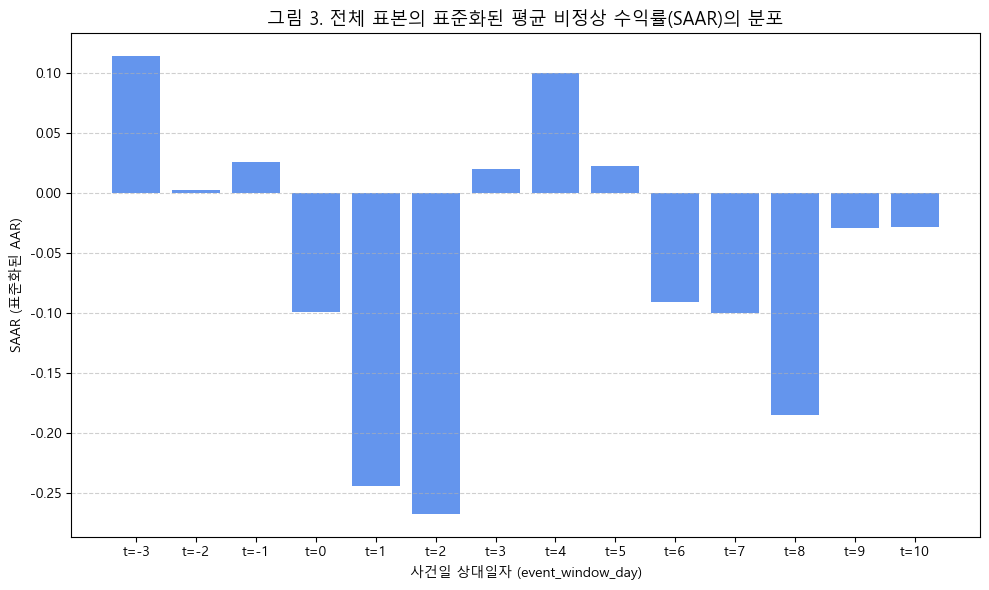

In [99]:
import matplotlib.pyplot as plt

# 한글 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 정렬
saar_df_sorted = saar_df.sort_values('event_window_day')

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(saar_df_sorted['event_window_day'], saar_df_sorted['SAAR'], color='cornflowerblue')

plt.xticks(saar_df_sorted['event_window_day'], 
           [f"t={i}" for i in saar_df_sorted['event_window_day']], rotation=0)

plt.title("그림 3. 전체 표본의 표준화된 평균 비정상 수익률(SAAR)의 분포", fontsize=13)
plt.xlabel("사건일 상대일자 (event_window_day)")
plt.ylabel("SAAR (표준화된 AAR)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

> 표 3. 전체 표본의 표준화된 평균 비정상 수익률(SAAR)의 결과 값 

| 열               | 설명                             |
| --------------- | ------------------------------ |
| **Event day**   | 사건일 기준 상대 날짜 (`t=-10 ~ t=+10`) |
| **SAARs(%)**    | AAR을 표준편차로 나눈 값, 퍼센트 변환        |
| **T-statistic** | AAR의 t-값                       |
| **P-value**     | AAR의 단일표본 t-검정 p값              |


In [27]:
from scipy.stats import ttest_1samp

summary_rows = []

for day in range(-10, 11):
    day_df = abnormal[abnormal['event_window_day'] == day]
    ar_values = day_df['비정상 수익률']

    if len(ar_values) == 0:
        continue

    aar = ar_values.mean()
    std = ar_values.std(ddof=1)
    n = len(ar_values)

    # SAAR 계산
    saar = (aar / std) * 100 if std != 0 else np.nan

    # t-test 수행
    t_stat, p_val = ttest_1samp(ar_values, 0)

    summary_rows.append({
        'Event day': f"AR({day})",
        'SAARs(%)': round(saar, 2),
        'T-Statistic': round(t_stat, 3),
        'P-value': round(p_val, 3)
    })

# 결과 DataFrame 생성
saar_summary = pd.DataFrame(summary_rows)
saar_summary
# 저장
# saar_summary.to_csv("SAAR_표준화_테이블.csv", index=False)


,Event day,SAARs(%),T-Statistic,P-value
0,AR(-10),9.64,1.370,0.172
1,AR(-9),11.29,1.351,0.179
2,AR(-8),-0.74,-0.105,0.917
3,AR(-7),0.39,0.069,0.945
4,AR(-6),-17.59,-2.830,0.005
5,AR(-5),-23.70,-3.443,0.001
6,AR(-4),-2.10,-0.300,0.764
7,AR(-3),11.58,1.646,0.101
8,AR(-2),0.68,0.083,0.934
9,AR(-1),2.32,0.319,0.750


> 표 4. 전체 표본의 누적 평균 비정상 수익률(CAAR)

| 열               | 설명                                 |
| --------------- | ---------------------------------- |
| **Event day**   | 사건일 기준 상대 날짜 (`t=-10 ~ t=+10`)     |
| **CAAR(%)**     | 해당일까지 누적 AAR의 평균 수익률               |
| **T-Statistic** | 해당일까지의 사건별 CAR 집합에 대한 단일표본 t-검정 결과 |


In [194]:
from scipy.stats import ttest_1samp
import pandas as pd
import numpy as np

# 결과 저장용 리스트
caar_summary = []

# 분석 대상 날짜
for t in range(-10, 11):
    # 각 사건에 대해 t일까지 누적된 AR 합계 구하기
    car_by_event = (
        abnormal[abnormal['event_window_day'] <= t]
        .groupby(['소속사', '연예인 이름', '사건 날짜'])['비정상 수익률']
        .sum()
        .reset_index()
        .rename(columns={'비정상 수익률': 'CAR'})
    )

    # CAAR 및 t-검정
    car_values = car_by_event['CAR']
    caar = car_values.mean() * 100  # 퍼센트 변환
    t_stat, p_val = ttest_1samp(car_values, 0)

    caar_summary.append({
        'Event day': f"AR({t})",
        'CAAR(%)': round(caar, 2),
        'T-Statistic': round(t_stat, 5),
        'P-value': round(p_val, 3)
    })

# 데이터프레임 변환
caar_df = pd.DataFrame(caar_summary)

# 결과 확인
caar_df
# 저장 선택
# caar_df.to_csv("CAAR_t검정_테이블.csv", index=False)


,Event day,CAAR(%),T-Statistic,P-value
0,AR(-10),0.46,0.20630,0.837
1,AR(-9),1.73,0.70290,0.483
2,AR(-8),1.61,0.76515,0.445
3,AR(-7),1.68,0.69522,0.487
4,AR(-6),-0.25,-0.08755,0.930
5,AR(-5),-1.69,-0.56197,0.575
6,AR(-4),-1.95,-0.59452,0.553
7,AR(-3),-0.23,-0.06443,0.949
8,AR(-2),-0.14,-0.03830,0.969
9,AR(-1),0.16,0.04508,0.964


> 표 5.  전체 표본의 누적 비정상 수익률(CAR)의 결과 값

이거 결과 좀 이상하게 나옴

| 표       | 누적 기준                 | 집계 방법                     |
| ------- | --------------------- | ------------------------- |
| **표 4** | AAR을 t일까지 누적 → CAAR   | 사건 전체 평균을 누적              |
| **표 5** | 사건별 CAR을 구해서 → CAR 평균 | 사건별 개별 누적 수익률 집합으로 t-test |


In [199]:
from scipy.stats import ttest_1samp
import pandas as pd
import numpy as np

# 저장용 리스트
car_summary = []

# 날짜 기준 반복
for t in range(-10, 11):
    # 사건별로 t일까지 누적된 AR(CAR) 계산
    car_df = (
        abnormal[abnormal['event_window_day'] <= t]
        .groupby(['사건 날짜'])['비정상 수익률']
        .sum()
        .reset_index()
        .rename(columns={'비정상 수익률': 'CAR'})
    )

    car_values = car_df['CAR']

    # 평균, t값, p값 계산
    car_avg = car_values.mean() * 100  # 퍼센트화
    t_stat, p_val = ttest_1samp(car_values, 0)

    car_summary.append({
        'Event day': f"AR({t})",
        'CAR Average(%)': round(car_avg, 2),
        'T-Statistic': round(t_stat, 3),
        'P-value': round(p_val, 3)
    })

# 요약 테이블 생성
car_table = pd.DataFrame(car_summary)

# 출력
car_table
# 저장 선택 가능
# car_table.to_csv("CAR_t검정_결과표.csv", index=False)


,Event day,CAR Average(%),T-Statistic,P-value
0,AR(-10),0.50,0.205,0.838
1,AR(-9),1.87,0.701,0.484
2,AR(-8),1.75,0.763,0.446
3,AR(-7),1.81,0.696,0.487
4,AR(-6),-0.27,-0.088,0.930
5,AR(-5),-1.82,-0.564,0.573
6,AR(-4),-2.11,-0.596,0.552
7,AR(-3),-0.24,-0.064,0.949
8,AR(-2),-0.15,-0.038,0.969
9,AR(-1),0.17,0.045,0.964


In [196]:
car_by_event['CAR'].shape[0]

313

> 표 6. 특정 기간 동안의 누적 비정상 수익률(CAR)의 결과 값

| 항목                | 설명                                  |
| ----------------- | ----------------------------------- |
| **구간 (interval)** | event\_window\_day 기준 예: `[-5, +5]` |
| **CAARs(%)**      | 해당 구간에서 사건별 CAR 평균 (누적 비정상 수익률의 평균) |
| **T-statistic**   | 사건별 CAR 리스트에 대한 단일표본 t검정 결과         |
| **P-value**       | 해당 t값의 유의확률 (two-sided)             |


In [201]:
from scipy.stats import ttest_1samp
import pandas as pd

# 분석할 구간 리스트
intervals = [
    (-10, 10), (-10, 2), (-5, 5), (-5, 2),
    (-1, 0), (0, 1), (-1, 1),
    (1, 2), (1, 5), (1, 10), (-1, 10)
]

# 결과 저장 리스트
interval_summary = []

for start, end in intervals:
    interval_df = abnormal[abnormal['event_window_day'].between(start, end)]

    # 사건별 CAR 계산
    car_by_event = (
        interval_df.groupby(['소속사', '사건 날짜'])['비정상 수익률']
        .sum()
        .reset_index()
        .rename(columns={'비정상 수익률': 'CAR'})
    )

    car_values = car_by_event['CAR']
    caar = car_values.mean() * 100  # 퍼센트
    t_stat, p_val = ttest_1samp(car_values, 0)

    interval_summary.append({
        'TIME INTERVAL': f"AR({start}); AR({end})",
        'CAARs(%)': round(caar, 2),
        'T-statistic': round(t_stat, 3),
        'P-value': round(p_val, 3)
    })

# 테이블 생성
interval_df = pd.DataFrame(interval_summary)
interval_df
# 저장 가능
# interval_df.to_csv("구간별_CAAR_테이블.csv", index=False)


,TIME INTERVAL,CAARs(%),T-statistic,P-value
0,AR(-10); AR(10),-7.14,-1.253,0.211
1,AR(-10); AR(2),-4.55,-1.334,0.183
2,AR(-5); AR(5),-3.04,-0.855,0.393
3,AR(-5); AR(2),-5.18,-2.365,0.019
4,AR(-1); AR(0),-1.16,-0.960,0.338
5,AR(0); AR(1),-3.78,-3.074,0.002
6,AR(-1); AR(1),-3.47,-2.444,0.015
7,AR(1); AR(2),-5.06,-3.756,0.000
8,AR(1); AR(5),-1.98,-0.920,0.358
9,AR(1); AR(10),-6.72,-2.095,0.037


### 3. 데이터 정리

In [26]:
# 필요한 컬럼만 추출해 병합
ar1_df = abnormal[abnormal['event_window_day'] == 1][
    ['소속사', '연예인 이름', '사건 날짜', '비정상 수익률']
].rename(columns={'비정상 수익률': 'AR1'})

ar2_df = abnormal[abnormal['event_window_day'] == 2][
    ['소속사', '연예인 이름', '사건 날짜', '비정상 수익률']
].rename(columns={'비정상 수익률': 'AR2'})

# 병합
merged = pd.merge(ar1_df, ar2_df, on=['소속사', '연예인 이름', '사건 날짜'], how='inner')

# 병합 후 다시 메타정보 붙이기
meta_info = abnormal[['소속사', '연예인 이름', '사건 날짜', '그룹', '사건 내용']].drop_duplicates()
merged = pd.merge(merged, meta_info, on=['소속사', '연예인 이름', '사건 날짜'], how='left')

# CAR 계산
merged['CAR(1,2)'] = merged['AR1'] + merged['AR2']

print(merged.head())

    소속사 연예인 이름      사건 날짜       AR1       AR2     그룹  \
0  HYBE     지민 2022-04-25  0.027321  0.018462  방탄소년단   
1  HYBE     정국 2024-01-06 -0.017447  0.018590  방탄소년단   
2  HYBE     제이 2023-01-10 -0.001733 -0.012679   엔하이픈   
3  HYBE    김채원 2023-09-05 -0.003702 -0.011398   르세라핌   
4  HYBE    김채원 2022-10-19 -0.025109  0.010665   르세라핌   

                                               사건 내용  CAR(1,2)  
0  2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...  0.045783  
1  2024년 1월 6일, 정국이 입대 후 신병 교육을 받는 동안 발생했다. 탈취범은 ...  0.001144  
2  2023년 1월 10일, 멤버 성훈과 함께 진행한 위버스 라이브 도중 요즘 한국사 ... -0.014412  
3  2023년 9월 5일 방송통신심의위원회 방송소위원회에서 “경찰에서 무혐의 결론이 났... -0.015100  
4  2022년 10월 19일 김채원 과 허윤진 이 차량 이동 중 접촉 사고 를 당했다.... -0.014444  


In [27]:
merged.to_csv("사건별_AR1_AR2_CAR12.csv", index=False, encoding='utf-8-sig')

In [28]:
len(merged)

311